In [7]:
#Script to obtain data 
from helpers import *
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries to create the multiclass model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

#Library to validate the model
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
df = pd.read_csv("data/data_moods.csv")
df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [10]:
df.shape

(686, 19)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   release_date      686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

In [22]:
df.describe()

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,41.534985,221791.485423,0.500553,0.449749,0.507693,0.349610,0.166867,0.342438,-11.531020,0.053946,119.134679,5.335277,3.870262
std,23.045707,63399.058492,0.158955,0.410729,0.326490,0.410517,0.142128,0.252304,7.468629,0.041374,28.978685,3.550858,0.500297
min,0.000000,76773.000000,0.078900,0.000005,0.001290,0.000000,0.031800,0.035300,-42.018000,0.023200,50.960000,0.000000,1.000000
25%,30.000000,179114.500000,0.388000,0.014825,0.202000,0.000034,0.092500,0.131250,-15.858750,0.033200,99.008750,2.000000,4.000000
50%,47.000000,213273.000000,0.505000,0.359000,0.495500,0.026350,0.111000,0.282000,-9.358000,0.040700,120.071000,6.000000,4.000000
75%,57.000000,254569.750000,0.612000,0.905750,0.844000,0.858250,0.173750,0.508750,-5.634500,0.057375,132.953250,9.000000,4.000000
max,88.000000,518373.000000,0.941000,0.996000,0.994000,0.966000,0.963000,0.977000,1.342000,0.416000,217.950000,11.000000,5.000000


In [12]:
pd.set_option('max_columns', None)
df.corr()

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
popularity,1.000000,-0.086197,0.134086,-0.039792,0.056923,-0.125816,0.034065,0.054375,0.100066,0.056608,0.016300,-0.080725,0.095547
length,-0.086197,1.000000,-0.041378,-0.165689,0.116968,-0.165860,-0.044103,0.003923,0.182840,-0.060854,0.007995,0.034683,0.021997
danceability,0.134086,-0.041378,1.000000,-0.324908,0.332579,-0.292267,0.105590,0.526196,0.350843,0.115579,-0.031581,-0.001598,0.100803
acousticness,-0.039792,-0.165689,-0.324908,1.000000,-0.902001,0.578946,-0.289672,-0.495770,-0.790299,-0.285138,-0.285407,0.055456,-0.184460
energy,0.056923,0.116968,0.332579,-0.902001,1.000000,-0.591110,0.341227,0.528810,0.854015,0.342475,0.318882,-0.051011,0.183390
instrumentalness,-0.125816,-0.165860,-0.292267,0.578946,-0.591110,1.000000,-0.203588,-0.493577,-0.713969,-0.243862,-0.221368,0.024498,-0.155669
liveness,0.034065,-0.044103,0.105590,-0.289672,0.341227,-0.203588,1.000000,0.166171,0.269900,0.244812,0.127330,-0.013686,0.010085
valence,0.054375,0.003923,0.526196,-0.495770,0.528810,-0.493577,0.166171,1.000000,0.433263,0.176182,0.130014,-0.042879,0.138277
loudness,0.100066,0.182840,0.350843,-0.790299,0.854015,-0.713969,0.269900,0.433263,1.000000,0.245819,0.285813,-0.027717,0.216719
speechiness,0.056608,-0.060854,0.115579,-0.285138,0.342475,-0.243862,0.244812,0.176182,0.245819,1.000000,0.112973,0.029047,0.034263


<AxesSubplot:>

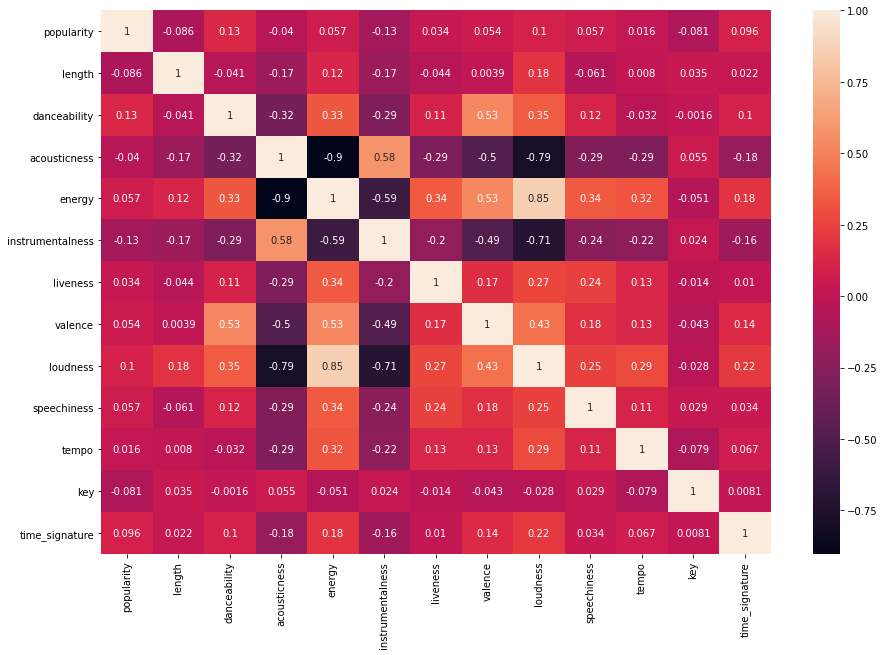

In [16]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True,ax=ax)

In [20]:
col_features = df.columns[6:-3]
X= MinMaxScaler().fit_transform(df[col_features])
X2 = np.array(df[col_features])
Y = df['mood']
X2

array([[ 3.79266e+05,  8.66000e-01,  1.37000e-01, ..., -8.20100e+00,
         7.67000e-02,  1.18523e+02],
       [ 3.18800e+05,  3.81000e-01,  1.89000e-02, ..., -5.06900e+00,
         4.92000e-02,  1.20255e+02],
       [ 2.17946e+05,  3.46000e-01,  9.13000e-01, ..., -1.53260e+01,
         3.21000e-02,  1.36168e+02],
       ...,
       [ 1.69265e+05,  6.42000e-01,  7.86000e-01, ..., -9.38600e+00,
         5.45000e-02,  1.24099e+02],
       [ 2.19146e+05,  5.61000e-01,  9.13000e-01, ..., -1.50990e+01,
         4.04000e-02,  1.02128e+02],
       [ 1.86331e+05,  3.77000e-01,  9.94000e-01, ..., -2.84350e+01,
         3.97000e-02,  1.40179e+02]])

In [4]:
#Encodethe categories
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)


#Convert to  dummy (Not necessary in my case)
dummy_y = np_utils.to_categorical(encoded_y)

X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=15)

target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [5]:
def base_model():
    #Create the model
    model = Sequential()
    #Add 1 layer with 8 nodes,input of 4 dim with relu function
    model.add(Dense(8,input_dim=10,activation='relu'))
    #Add 1 layer with output 3 and softmax function
    model.add(Dense(4,activation='softmax'))
    #Compile the model using sigmoid loss function and adam optim
    model.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])
    return model

In [6]:
#Configure the model
estimator = KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0)

In [7]:
#Evaluate the model using KFold cross validation
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,encoded_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

C:\Users\dishita\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
C:\Users\dishita\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
C:\Users\dishita\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future ver

Baseline: 79.45% (2.70%)


C:\Users\dishita\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [8]:
estimator.fit(X_train,Y_train)
y_preds = estimator.predict(X_test)

C:\Users\dishita\AppData\Roaming\Python\Python39\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


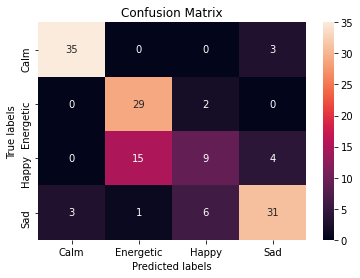

Accuracy Score 0.7536231884057971


In [9]:

cm = confusion_matrix(Y_test,y_preds)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(Y_test,y_preds))

In [10]:
def predict_mood(id_song):
    #Join the model and the scaler in a Pipeline
    pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
                                                                             batch_size=200,verbose=0))])
    #Fit the Pipeline
    pip.fit(X2,encoded_y)
    
    #Obtain the features of the song
    preds = get_songs_features(id_song)
    #Pre-process the features to input the Model
    preds_features = np.array(preds[0][6:-2]).reshape(-1,1).T

    #Predict the features of the song
    results = pip.predict(preds_features)

    mood = np.array(target['mood'][target['encode']==int(results)])
    name_song = preds[0][0]
    artist = preds[0][2]
    print("{0} by {1} is a {2} song".format(name_song,artist,mood[0].upper()))
    if mood[0].upper()=='HAPPY' or mood[0].upper()=='ENERGETIC':
        id='4VQMOVhJP7xEKM1y5H4YQM'
        endpoint_p="https://open.spotify.com/embed/playlist/"
        lookup_playlist=f"{endpoint_p}{id}"
        print("\nRecommended playlist of ENERGETIC songs is : ")
        print(lookup_playlist)
    else:
        id='0P5kYTgLdhrMq8UsEg4aYL'
        endpoint_p="https://open.spotify.com/embed/playlist/"
        lookup_playlist=f"{endpoint_p}{id}"
        print("\nRecommended playlist of RELAXING songs is : ")
        print(lookup_playlist)


    return 
    #print(f"{name_song} by {artist} is a {mood[0].upper()} song")
    

In [6]:
from helpers import *

id = get_song_id("Someone you loved")
final_id = id['tracks']['items'][0]['id']
print(final_id)
#print(id)
print(id['tracks']['items'][0]['external_urls']['spotify'])

7qEHsqek33rTcFNT9PFqLf
https://open.spotify.com/track/7qEHsqek33rTcFNT9PFqLf


In [12]:
#predict_mood('1UeeRb6xDhUFtdjEO48AZ5')
predict_mood(final_id)


Someone You Loved by Lewis Capaldi is a SAD song

Recommended playlist of RELAXING songs is : 
https://open.spotify.com/embed/playlist/0P5kYTgLdhrMq8UsEg4aYL


C:\Users\dishita\AppData\Roaming\Python\Python39\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\dishita\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
